# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [5]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [6]:
X=torch.randn(4, 3)
Y=torch.randn(4, 3)

# 행으로 병합 코드
concat_row = torch.cat((X, Y), dim=1)
# 열로 병합 코드
concat_col = torch.cat((X, Y), dim=0)
concat_row, concat_col

(tensor([[ 0.8372, -0.5363, -0.2290,  0.8118,  1.5460, -1.9397],
         [ 0.3155, -0.8821,  2.1040, -0.3859,  1.0133,  0.3375],
         [-0.9982,  0.2446,  0.4542, -0.0679,  1.3388,  0.3144],
         [-1.7670,  0.0488,  0.8293, -1.7252, -1.1697, -0.2959]]),
 tensor([[ 0.8372, -0.5363, -0.2290],
         [ 0.3155, -0.8821,  2.1040],
         [-0.9982,  0.2446,  0.4542],
         [-1.7670,  0.0488,  0.8293],
         [ 0.8118,  1.5460, -1.9397],
         [-0.3859,  1.0133,  0.3375],
         [-0.0679,  1.3388,  0.3144],
         [-1.7252, -1.1697, -0.2959]]))

### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [7]:
!pip install --quiet d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 910.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have nump

In [8]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [9]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [10]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.5414, -1.3430]) 
label: tensor([12.1301])


In [11]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [12]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0504,  0.9733],
        [ 0.9971, -0.2393],
        [ 1.3286, -2.5165],
        [-2.2013,  0.5004],
        [-0.9840,  0.3523],
        [-0.2470,  0.1538],
        [ 0.4433,  1.9201],
        [-0.4245,  0.4011],
        [-0.3025,  0.3607],
        [-1.9374,  0.9217],
        [ 0.2855,  0.0102],
        [-1.4543,  1.2898],
        [ 0.3862,  0.9810],
        [ 0.5906,  1.6977],
        [-1.5607,  0.6068],
        [ 0.0487, -1.0858],
        [-0.3481,  2.2362],
        [-1.0625,  0.0386],
        [ 0.3335, -0.3649],
        [-1.4119, -1.0879]]) 
 tensor([[ 3.8913],
        [ 8.8489],
        [13.2658],
        [-1.8651],
        [ 2.0142],
        [ 4.5260],
        [ 3.9391],
        [ 3.6157],
        [ 4.0442],
        [-1.6953],
        [ 6.3358],
        [-0.7968],
        [ 5.1904],
        [ 4.7240],
        [-0.0939],
        [ 7.2686],
        [ 1.1112],
        [ 2.2429],
        [ 7.0475],
        [ 2.9015]])


In [13]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0], requires_grad=True) #원하는 실수를 넣어주세요

In [14]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드 완성하기

In [15]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat - y)**2) ###loss function 직접 짜보기

In [16]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()

In [17]:
lr = 0.01 ###직접 설정
num_epochs = 100 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기
w_val = [[], []]
loss_val = []


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  ###채워넣기
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  ###채워넣기
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        w_val[0].append(w.data.numpy().tolist()[0][0])
        w_val[1].append(w.data.numpy().tolist()[1][0])
        loss_val.append(float(train_l.mean()))
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 26.253847
epoch 2, loss 21.397606
epoch 3, loss 17.440952
epoch 4, loss 14.216971
epoch 5, loss 11.589836
epoch 6, loss 9.448842
epoch 7, loss 7.703907
epoch 8, loss 6.281670
epoch 9, loss 5.122344
epoch 10, loss 4.177283
epoch 11, loss 3.406821
epoch 12, loss 2.778654
epoch 13, loss 2.266473
epoch 14, loss 1.848832
epoch 15, loss 1.508257
epoch 16, loss 1.230505
epoch 17, loss 1.003971
epoch 18, loss 0.819196
epoch 19, loss 0.668474
epoch 20, loss 0.545526
epoch 21, loss 0.445220
epoch 22, loss 0.363382
epoch 23, loss 0.296609
epoch 24, loss 0.242124
epoch 25, loss 0.197664
epoch 26, loss 0.161382
epoch 27, loss 0.131771
epoch 28, loss 0.107601
epoch 29, loss 0.087874
epoch 30, loss 0.071771
epoch 31, loss 0.058627
epoch 32, loss 0.047894
epoch 33, loss 0.039133
epoch 34, loss 0.031979
epoch 35, loss 0.026137
epoch 36, loss 0.021368
epoch 37, loss 0.017473
epoch 38, loss 0.014292
epoch 39, loss 0.011693
epoch 40, loss 0.009571
epoch 41, loss 0.007838
epoch 42, loss 0.006

In [18]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0001, -0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0001], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

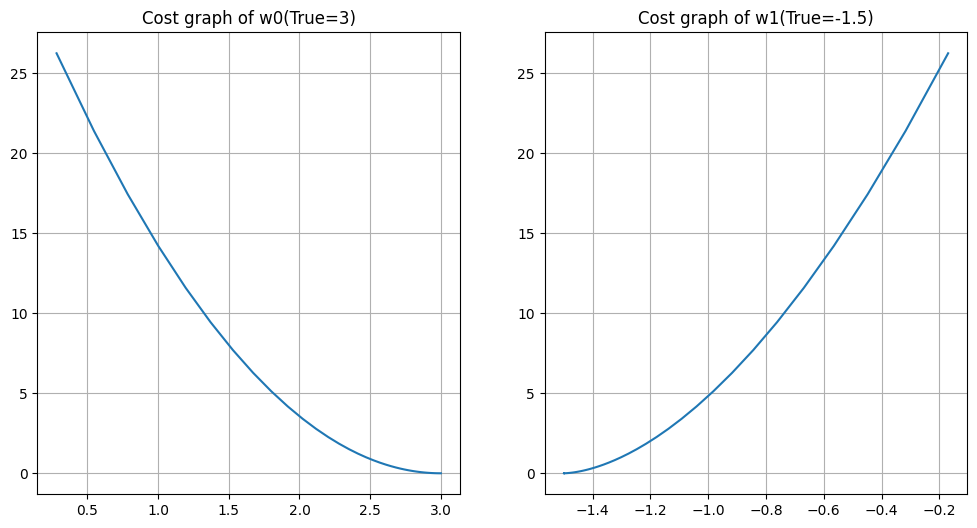

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(w_val[0], loss_val)
plt.title('Cost graph of w0(True=3)')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(w_val[1], loss_val)
plt.title('Cost graph of w1(True=-1.5)')

plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [20]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [21]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [22]:
next(iter(data_iter))

[tensor([[-0.3386, -0.4529],
         [ 0.6246,  0.3912],
         [-0.1366, -0.7928],
         [ 1.2130,  0.8777],
         [ 1.0526,  0.0630],
         [ 0.1434,  0.0541],
         [-1.5926,  0.0110],
         [ 1.0803, -0.1167],
         [ 0.2959, -0.7801],
         [ 0.0796, -0.3738],
         [-0.9865, -1.1688],
         [-0.7403,  0.5337],
         [ 1.4157,  1.0409],
         [-0.3583, -0.1958],
         [-0.6618,  0.5797],
         [-0.5273,  0.0658],
         [-0.0253, -0.5662],
         [ 1.1516, -0.8647],
         [-1.3295,  0.2666],
         [ 1.3576,  2.0943]]),
 tensor([[ 5.1730],
         [ 6.8040],
         [ 6.2796],
         [ 7.8221],
         [ 8.5608],
         [ 5.8524],
         [ 0.6984],
         [ 8.9092],
         [ 7.5502],
         [ 6.3120],
         [ 4.2918],
         [ 2.4840],
         [ 8.1882],
         [ 4.7136],
         [ 2.6443],
         [ 3.8172],
         [ 6.2743],
         [10.2599],
         [ 1.1288],
         [ 6.4293]])]

In [23]:
from torch import nn

net = nn.Sequential(
    nn.Linear(2, 1, bias=True) ###채워넣기
    )

In [24]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [25]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [26]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01) ###api function으로 직접 설정

In [27]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) ###직접설정
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.670412
epoch 2, loss 0.010682
epoch 3, loss 0.000272


In [28]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0054, -0.0032])
error in estimating b: tensor([0.0114])
